In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
data = pd.read_csv(r'C:\Users\vijayjaga\Desktop\Amazon_Music_Clustering\dataset\single_genre_artists.csv')

In [3]:
df= pd.DataFrame(data)

In [4]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [5]:
df.shape

(95837, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [7]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe

<bound method NDFrame.describe of                      id_songs          name_song  popularity_songs  \
0      0IA0Hju8CAgYfV1hwhidBH            La Java                 0   
1      1b8HZQCqcqwbzlA1jRTp6E           En Douce                 0   
2      5d5gQxHwYovxR5pqETOIAa      J'en Ai Marre                 0   
3      1EO65UEEPfy7CR0NK2sDxy   Ils n'ont pas ca                 0   
4      6a58gXSgqbIsXUhVZ6ZJqe          La belote                 0   
...                       ...                ...               ...   
95832  44r4zta6P9flkhKaVnbsvG             Freaks                70   
95833  0MmaEacabpK8Yp3Mdeo5uY                下雨天                50   
95834  1dKxf4Ht2SsKLyXfSDJAgy   The Cutest Puppy                67   
95835  0SjsIzJkZfDU7wlcdklEFR  John Brown's Song                66   
95836  5rgu12WBIHQtvej2MdHSH0                云与海                50   

       duration_ms  explicit              id_artists release_date  \
0           161427         0  4AxgXfD7ISvJSTObqm4aIE    

In [10]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [11]:
df['popularity_artists'].value_counts()

popularity_artists
90    3869
71    2531
34    2528
40    2455
42    2222
      ... 
95      18
91      15
86       9
81       6
87       3
Name: count, Length: 93, dtype: int64

In [12]:
df = df.drop(columns=['id_songs', 'id_artists','release_date'])

In [13]:
df.head()

,name_song,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,La Java,0,161427,0,0.563,0.184,4,-13.757,1,0.0512,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,En Douce,0,223440,0,0.427,0.180,10,-15.375,1,0.0670,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,J'en Ai Marre,0,208267,0,0.511,0.206,0,-15.514,1,0.0592,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,Ils n'ont pas ca,0,161933,0,0.676,0.467,9,-12.393,0,0.1650,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,La belote,0,167973,0,0.650,0.298,9,-13.806,1,0.1380,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [14]:
df.columns

Index(['name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'followers', 'genres', 'name_artists',
       'popularity_artists'],
      dtype='object')

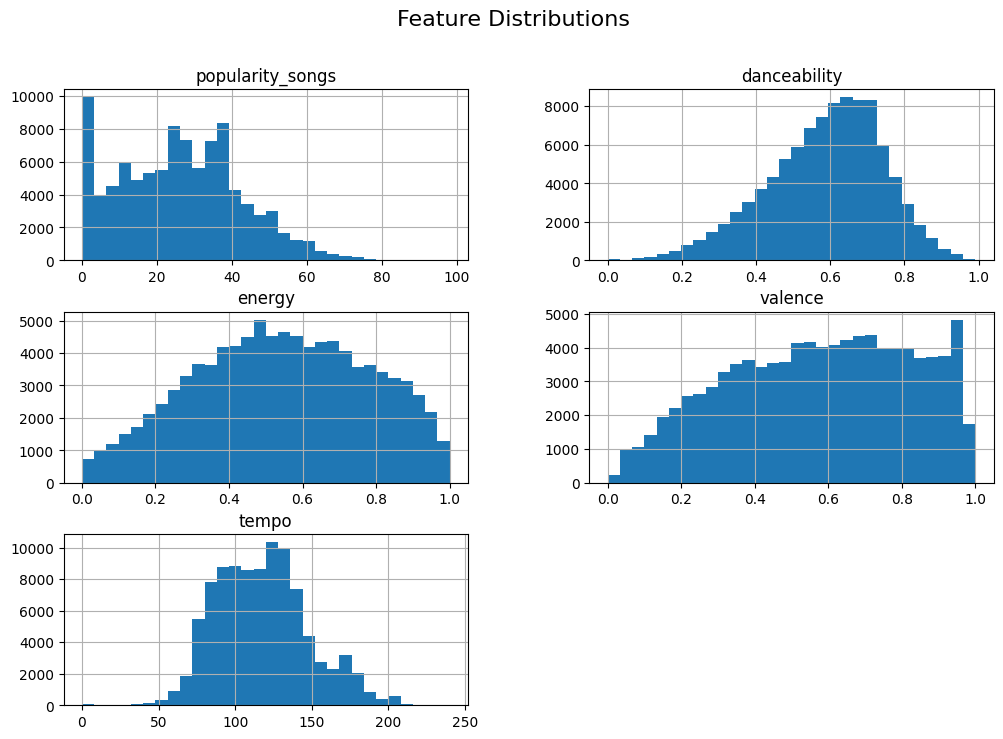

In [15]:
import matplotlib.pyplot as plt

key_features =['popularity_songs', 'danceability', 'energy', 'valence', 'tempo']

df[key_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df.select_dtypes(exclude='object')

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,0,161427,0,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,22
1,0,223440,0,0.427,0.1800,10,-15.375,1,0.0670,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,22
2,0,208267,0,0.511,0.2060,0,-15.514,1,0.0592,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,22
3,0,161933,0,0.676,0.4670,9,-12.393,0,0.1650,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,22
4,0,167973,0,0.650,0.2980,9,-13.806,1,0.1380,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,0.674,0.5680,1,-6.356,1,0.0408,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,56
95833,50,265846,0,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,36
95834,67,82500,0,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,52
95835,66,185250,0,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,55


In [18]:
df.dtypes

name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object

In [19]:
df=df.drop(columns=['time_signature','key','mode','explicit'])

In [20]:
df.columns

Index(['name_song', 'popularity_songs', 'duration_ms', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'followers', 'genres', 'name_artists',
       'popularity_artists'],
      dtype='object')

In [21]:
df.shape

(95837, 16)

In [22]:
df_clus=df[[ 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]

In [23]:
df_clus

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088
1,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459
2,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443
3,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775
4,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950
...,...,...,...,...,...,...,...,...,...
95832,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107
95833,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066
95834,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619
95835,0.562,0.0331,-25.551,0.1030,0.996,0.961000,0.1110,0.386,63.696


In [24]:
SC=StandardScaler()
sc_arr=SC.fit_transform(df_clus)

In [25]:
sc_df=pd.DataFrame(sc_arr,columns=df_clus.columns)
sc_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593
...,...,...,...,...,...,...,...,...,...
95832,0.560713,0.113908,0.800599,-0.464870,-1.038056,-0.353405,-0.322428,0.264864,1.608703
95833,-0.378671,0.558254,1.372746,-0.499000,-0.956340,-0.353405,-0.678133,-1.117507,0.414907
95834,0.142494,-2.217003,-3.877872,-0.184566,1.625267,3.832648,-0.629163,1.272422,-1.620420
95835,-0.159910,-2.149717,-3.241498,-0.239029,1.625267,3.781021,-0.613019,-0.758816,-1.783486


In [26]:
sc_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [27]:
from sklearn.cluster import KMeans

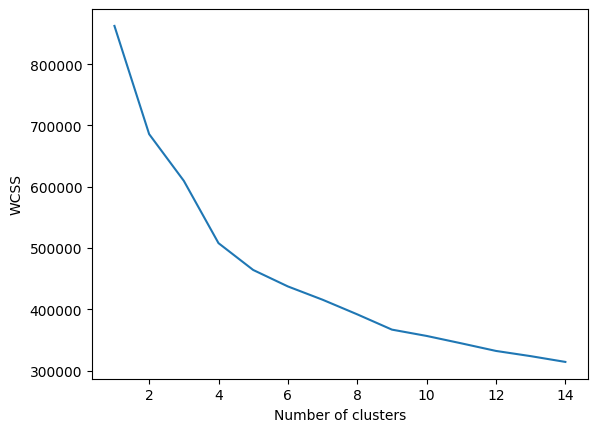

In [28]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,n_init='auto',max_iter=3000)
    kmeans.fit(sc_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

without pca

In [29]:
sc_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [30]:
from sklearn.metrics import silhouette_score

best_k = None
best_score = -1

for k in range(2, 10):  # test from 2 to 12 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sc_df)
    score = silhouette_score(sc_df, labels)
    print(f"k={k}, Silhouette Score={score}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"Best k: {best_k}, with Silhouette Score: {best_score}")

k=2, Silhouette Score=0.2102893985614504
k=3, Silhouette Score=0.2134341282822805
k=4, Silhouette Score=0.2393902496569448
k=5, Silhouette Score=0.19552853747859067
k=6, Silhouette Score=0.16901529594592285
k=7, Silhouette Score=0.16919920111494988
k=8, Silhouette Score=0.18815733036283147
k=9, Silhouette Score=0.18271074859312111
Best k: 4, with Silhouette Score: 0.2393902496569448


In [ ]:
best_k

In [32]:
kmeans=KMeans(n_clusters=best_k,random_state=0,n_init='auto')
kmeans.fit(sc_df)
kmeans.inertia_


507958.4249342675

In [33]:
sc_df['Target']=kmeans.predict(sc_df)

apply pca  to reduce diminsion

In [34]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components
# PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(sc_df)

# Create a new DataFrame with PCA columns
pca_df = pd.DataFrame(pca_result, columns=['pca1', 'pca2', 'pca3'])



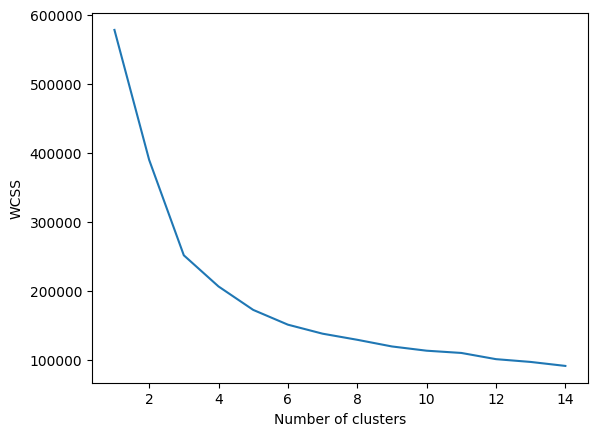

In [35]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,n_init='auto',max_iter=3000)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
from sklearn.metrics import silhouette_score

pca_best_k= None
pca_best_score = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")
    if score > pca_best_score:
        pca_best_k = k
        pca_best_score = score

print(f"Best k: {pca_best_k}, with Silhouette Score: {pca_best_score}")


k=2, Silhouette Score=0.3574
k=3, Silhouette Score=0.4409
k=4, Silhouette Score=0.3741
k=5, Silhouette Score=0.3367
k=6, Silhouette Score=0.2936
k=7, Silhouette Score=0.3033
k=8, Silhouette Score=0.2791
k=9, Silhouette Score=0.2751
Best k: 3, with Silhouette Score: 0.44089001014674734


In [ ]:
pca_best_k

In [44]:
#  Run KMeans on PCA features
kmeans = KMeans(n_clusters=pca_best_k, random_state=42, n_init='auto')  # choose k based on elbow/silhouette
pca_df['cluster'] = kmeans.fit_predict(pca_df)

In [45]:

# 3D Scatter Plot with color by cluster
fig = px.scatter_3d(
    pca_df,
    x='pca1',
    y='pca2',
    z='pca3',
    color='cluster',  # 👈 differentiates clusters by color
    title="Clusters Visualized in 3D (PCA Projection)"
)

fig.update_layout(width=800, height=700)
fig.show()

In [46]:
sc_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'Target'],
      dtype='object')

In [47]:
df['cluster']=sc_df['Target']

In [48]:
df.columns

Index(['name_song', 'popularity_songs', 'duration_ms', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'followers', 'genres', 'name_artists',
       'popularity_artists', 'cluster'],
      dtype='object')

here i fill genre based on the cluster

In [49]:


def clean_genres(genres):
    if isinstance(genres, list):
        return " ".join(genres) if len(genres) > 0 else None
    elif isinstance(genres, str) and genres.strip() != "":
        return genres
    else:
        return None

df['genres_clean'] = df['genres'].apply(clean_genres)


In [ ]:
from collections import Counter

cluster_genre_map = {}

for c in df['cluster'].unique():
    cluster_data = df[df['cluster'] == c]['genres_clean'].dropna()
    if len(cluster_data) > 0:
        most_common_genre = Counter(cluster_data).most_common(1)[0][0]
        cluster_genre_map[c] = most_common_genre
    else:
        cluster_genre_map[c] = "unknown"  


In [51]:
df['genres_filled'] = df.apply(
    lambda row: row['genres_clean'] if row['genres_clean'] is not None else cluster_genre_map[row['cluster']],
    axis=1
)


In [ ]:
df[['genres', 'genres_filled', 'cluster']]


,genres,genres_filled,cluster
0,['vintage chanson'],['vintage chanson'],1
1,['vintage chanson'],['vintage chanson'],1
2,['vintage chanson'],['vintage chanson'],1
3,['vintage chanson'],['vintage chanson'],1
4,['vintage chanson'],['vintage chanson'],1
...,...,...,...
95832,['alt z'],['alt z'],2
95833,['chinese viral pop'],['chinese viral pop'],2
95834,['instrumental lullaby'],['instrumental lullaby'],0
95835,['instrumental lullaby'],['instrumental lullaby'],0


In [53]:
df['cluster'].value_counts()

cluster
2    46323
1    29189
3    12474
0     7851
Name: count, dtype: int64

In [54]:
df.columns

Index(['name_song', 'popularity_songs', 'duration_ms', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'followers', 'genres', 'name_artists',
       'popularity_artists', 'cluster', 'genres_clean', 'genres_filled'],
      dtype='object')

In [55]:
df=df.drop(columns=["genres_clean","genres_filled"])

In [56]:
df['profile']=df['genres']+" "+df['name_artists']

In [57]:
df.sample(5)

,name_song,popularity_songs,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,genres,name_artists,popularity_artists,cluster,profile
28783,Ay,56,260714,0.685,0.7630,-6.540,0.0839,0.004430,0.000164,0.2170,0.4180,90.010,2276800.0,['turkish pop'],Tarkan,67,2,['turkish pop'] Tarkan
51959,Make Believe Mambo,36,323293,0.570,0.5190,-14.524,0.0324,0.417000,0.000307,0.0695,0.8880,115.896,254140.0,"['art pop', 'art punk', 'art rock', 'permanent...",David Byrne,57,2,"['art pop', 'art punk', 'art rock', 'permanent..."
79735,Un sonno sereno,34,101338,0.357,0.0383,-14.982,0.0334,0.965000,0.939000,0.1120,0.1870,84.891,560.0,['musica per bambini'],Matteo Bosi,46,0,['musica per bambini'] Matteo Bosi
62821,Karamell,19,253400,0.608,0.9230,-2.726,0.0337,0.000057,0.000051,0.0821,0.5500,103.997,29356.0,['hungarian rock'],Road,42,2,['hungarian rock'] Road
6331,Reflections In D,21,420653,0.413,0.0529,-20.837,0.0438,0.991000,0.926000,0.0670,0.0385,102.172,466010.0,"['adult standards', 'bebop', 'cool jazz', 'jaz...",Bill Evans,66,0,"['adult standards', 'bebop', 'cool jazz', 'jaz..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(df['profile'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 382584 stored elements and shape (95837, 22041)>

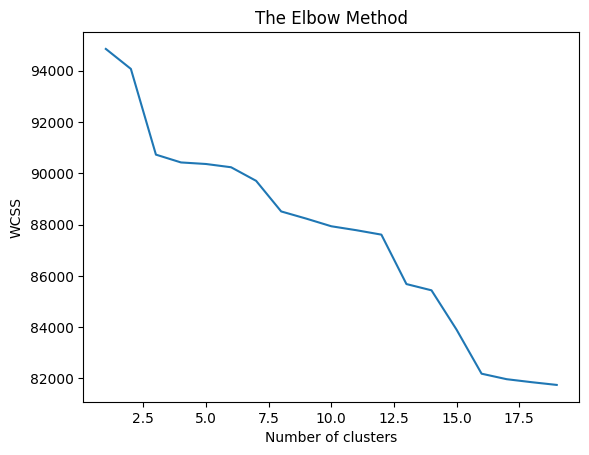

In [ ]:
wcss=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(tfidf_matrix)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=16,random_state=0)
kmeans.fit(tfidf_matrix)

,n_clusters,16
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
df['cluser']=kmeans.predict(tfidf_matrix)

In [ ]:
df[df['cluser']==1]['profile']

40078    ['hoerspiel'] Fünf Freunde
40079    ['hoerspiel'] Fünf Freunde
40080    ['hoerspiel'] Fünf Freunde
40081    ['hoerspiel'] Fünf Freunde
40082    ['hoerspiel'] Fünf Freunde
                    ...            
40885    ['hoerspiel'] Fünf Freunde
40886    ['hoerspiel'] Fünf Freunde
40887    ['hoerspiel'] Fünf Freunde
40888    ['hoerspiel'] Fünf Freunde
40889    ['hoerspiel'] Fünf Freunde
Name: profile, Length: 812, dtype: object

cosine similarity

In [ ]:
song_to_index = pd.Series(df.index, index=df['name_song']).to_dict()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend(song_name, n=5):
    if song_name not in song_to_index:
        return f"❌ Song '{song_name}' not found."

    idx = song_to_index[song_name]

    song_vec = tfidf_matrix[idx]
    sim_scores = cosine_similarity(song_vec, tfidf_matrix)[0]

    top_indices = sim_scores.argsort()[::-1][1:n+1]

    return df.iloc[top_indices][['name_song', 'name_artists', 'genres']]


In [ ]:
recommend("La Java", n=5)


,name_song,name_artists,genres
4,La belote,Mistinguett,['vintage chanson']
3,Ils n'ont pas ca,Mistinguett,['vintage chanson']
2,J'en Ai Marre,Mistinguett,['vintage chanson']
1,En Douce,Mistinguett,['vintage chanson']
18,Gosse De Paris,Mistinguett,['vintage chanson']


In [ ]:
df['name_song']

0                  La Java
1                 En Douce
2            J'en Ai Marre
3         Ils n'ont pas ca
4                La belote
               ...        
95832               Freaks
95833                  下雨天
95834     The Cutest Puppy
95835    John Brown's Song
95836                  云与海
Name: name_song, Length: 95837, dtype: object